# Exercise Sheet 5 – Parsing

# Learning Objectives

In this lab we're going to learn:
- to represent the structure of sentences using syntax trees;
- to use NLTK CFG parser;
- to use NLTK dependency parser;
- the difference between constituency parsing and dependency parsing.

### For Mac users
To run the notebook locally, execute te following cell.

In [2]:
!brew install ghostscript

To reinstall 10.0.0, run:
  brew reinstall ghostscript


### For Linux users
To run the notebook locally, execute te following cells.

In [ ]:
# # CREATE VIRTUAL DISPLAY
# !apt install ghostscript python3-tk

# # Install X Virtual Frame Buffer
# !apt-get install -y xvfb 

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

zsh:1: command not found: apt-get


In [ ]:
### CREATE VIRTUAL DISPLAY ###
# import os

# # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
# os.system('Xvfb :1 -screen 0 1600x1200x16  &')    
# os.environ['DISPLAY']=':1.0'

### For everyone

In [8]:
# Installing Berkeley Neural Parser
!pip install benepar

# Requirement to display trees
!pip install svgling

# Uncomment the next lines if you're running the code on your local machine

!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached benepar-0.2.0-py3-none-any.whl
  Using cached protobuf-4.21.7-cp37-abi3-macosx_10_9_universal2.whl (484 kB)
  Using cached tokenizers-0.13.1-cp39-cp39-macosx_12_0_arm64.whl (3.6 MB)
  Using cached transformers-4.22.2-py3-none-any.whl (4.9 MB)
  Using cached torch_struct-0.5-py3-none-any.whl (34 kB)
  Using cached sentencepiece-0.1.97-cp39-cp39-macosx_11_0_arm64.whl (1.1 MB)
  Using cached torch-1.12.1-cp39-none-macosx_11_0_arm64.whl (49.1 MB)
  Using cached tokenizers-0.12.1.tar.gz (220 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached filelock-3.8.0-py3-none-any.whl (10 kB)
  Using cached PyYAML-6.0-cp39-cp39-macosx_11_0_arm64.whl (173 kB)
  Using cached huggingface_hub-0.10.0-py3-none-any.whl (163 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.0/en_core_web_sm-3.4.0-py3-none-any.whl (12.8 MB)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
!pip install tensorflow==1.15.4
!pip install -U transformers

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.4 (from versions: none)
ERROR: No matching distribution found for tensorflow==1.15.4
  Using cached transformers-4.22.2-py3-none-any.whl (4.9 MB)
  Using cached filelock-3.8.0-py3-none-any.whl (10 kB)
  Using cached tokenizers-0.12.1.tar.gz (220 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyYAML-6.0-cp39-cp39-macosx_11_0_arm64.whl (173 kB)
  Using cached huggingface_hub-0.10.0-py3-none-any.whl (163 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      running bdist_wheel
      running build
      running build_py
      running build_ext
      running build_rust
      error: can't find Rust compiler
      
      If you are using an outdated pip version, it is possible a prebuilt wheel

# Syntax Trees

The structure of a sentence  can be represented with **syntax trees**, or **parse trees**. NLTK’s `tree` module implements the `Tree` class. It consists of a node value (typically a string label) and a Python iterable structure containing the node’s children. The iterable can be any Python iterable except for a string, but it is typically a list. The node’s children can be of any type, but they are typically leaf labels (i.e. strings) or `Tree` objects.


In [4]:
import nltk
from nltk.tree import *
from nltk.draw.tree import TreeView
%matplotlib inline
import IPython

In [5]:
import benepar, spacy
benepar.download('benepar_en3')

nlp = spacy.load('en_core_web_sm')
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})

ModuleNotFoundError: No module named 'benepar'

In [ ]:
t = Tree('S', [Tree('PRP',['We']), Tree('VBD', ['saw']),
                Tree('NP', [Tree('DT',['the']), Tree('JJ',['yellow']), Tree('NN',['dog'])]) ])

# Bracket notation
print(t)

# This does not work with Google Colab, but only locally
# A picture of a tree will open in a separate window
# print(t.draw())

# Prints the label of the root tree
print(t.label())

# Prints the first subtree of the root tree
print (list(i for i in t.subtrees())[1])

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


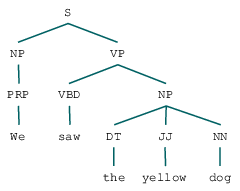

In [ ]:
# Another way to parse a sentence and display the tree diagram
from spacy import displacy

def constituency_parse(text):
    tree = Tree.fromstring(list(nlp(text).sents)[0]._.parse_string)
    IPython.core.display.display(tree)

constituency_parse("We saw the yellow dog")

### Exercise 1

Draw syntax trees of the two sentences below using NLTK.

1. "The student loved his NLP assignment."

2. "The big yellow book."


In [ ]:
# YOUR CODE HERE


# Constituency vs Dependency Parsing

**Syntactic parsing** is the task of analyzing the syntactic structure of a sentence. There are 2 major formalisms behind it in NLP:
1. Constituency grammar / GFG
2. Dependency grammar

### Constituency grammar 

A **context-free grammar (CFG)** is concerned with how words and sequences of words combine to form **constituents**. Modelling a syntactic structure on context-free grammar is known as **constituency parsing**. For this, we use a set of terminal and non-terminal symbols together with production rules to represent the constituents of a given sentence as shown in *Figure 1*. However, constituency parsing cannot handle lexical dependencies. Possible solution to this is using **probabilistic context-free grammar (PCFG)** or **dependency grammar**.

![CFG.png](https://i.pinimg.com/originals/a6/68/50/a668505fbc3f63178614d680289939d6.png)

*Figure 1: A constituency syntax tree*

#### Available tools

- <a href="https://github.com/nikitakit/self-attentive-parser">Berkeley Neural Parser</a>

### Dependency Grammar

**Dependency Grammar** is represented as a set of binary relations between words in a sentence. Each link has a label and forms an acyclic structure as shown in *Figure 2*.

![dependency.png](https://www.nltk.org/images/depgraph0.png)

*Figure 2: A dependency syntax tree*

#### Available tools
- <a href="http://nlp.stanford.edu:8080/parser/index.jsp">Stanford Parser</a> <br>
- <a href="http://www.cs.cmu.edu/~ark/TweetNLP/">CMU Twitter Parser</a> 
- <a href="http://ufal.mff.cuni.cz/udpipe">UDPipe</a>



## Consituency Parsing (CFG parsing)

In this example, let us parse a sentence using CFG rules. In order to do that we will use recursive descent parser from NLTK. 

In [ ]:
def CFG_parse(sentence):
    #grammar with only one rule
    grammar1 = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V NP 
    V -> "saw" 
    NP -> N | Det N | 
    Det -> "a" 
    N -> "dog" | "Mary"
    """)
    rd_parser = nltk.RecursiveDescentParser(grammar1)
    sent = sentence.split() # create a chunk parser using this grammar
    for tree in rd_parser.parse(sent):
        print (tree)
        return tree

cp = CFG_parse('Mary saw a dog')
#print(cp)

(S (NP (N Mary)) (VP (V saw) (NP (Det a) (N dog))))


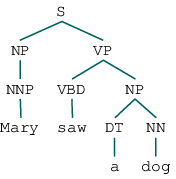

In [ ]:
# Display the tree diagram
def CFG_parse(text):
    tree = Tree.fromstring(list(nlp(text).sents)[0]._.parse_string)
    IPython.core.display.display(tree)

CFG_parse("Mary saw a dog")

### Exercise 2
Write a `CFG_parse(sentence)` function to parse the sentence "He hit the man with a hat". You may modify the CFG_parse function above.



In [ ]:
# YOUR CODE HERE

## Dependency Parsing

In [ ]:
# Based on dependency grammar rules to detect linguistic phrases

def dependency_parse(sentence):
    groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
    'shot' -> 'I' | 'elephant' | 'in'
    'elephant' -> 'an' | 'in'
    'in' -> 'pajamas'
    'pajamas' -> 'my'
    """)
    dp_parser = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
    sent = sentence.split() 
    trees = dp_parser.parse(sent)
    for tree in trees:
        print (tree)
        return tree
     

dp = dependency_parse('I shot an elephant in my pajamas')
#print(dp.draw())

(shot I (elephant an (in (pajamas my))))


In [ ]:
def dependency_parse(text):
    displacy.render(nlp(text),jupyter=True)

dependency_parse("I shot an elephant in my pajamas")

/Users/oksder/opt/anaconda3/lib/python3.7/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


### Exercise 3
Write a `dependency_parse(sentence)` function to parse the sentence "He hit the man with a hat". You may modify the dependency_parse function above.

In [ ]:
# YOUR CODE HERE

# Pen & Paper Exercises
## Computing Probabilities



### Exercise 4

Using given values, build a PCFG for the sentence *\"Astronomers saw stars with ears\"*. Provide at least 2 parse trees for the sentence and show which one has the highest probability.

S  → NP VP 1.0 

NP → NP PP 0.4

NP → N 0.6

PP → P NP 1.0

N → Astronomers 0.2

N → ears 0.25

N → saw 0.1

N → stars 0.25

N → telescopes 0.2

VP → V NP 0.7 

VP → VP PP 0.3

P → with 1.0 

V → saw 1.0 




### Exercise 5 

Lets' now convert our trees to **Chomsky Normal Form (CNF)**. A context free grammar (CFG) is in CNF if all production rules satisfy one of the following conditions:

* A non-terminal generating a terminal (X  → w)
* A non-terminal generating two non-terminals (X  → YZ)

Rewrite the CFG provided in **Exercise 4** and both trees you induced with it.

### Exercise 6

Draw a CYK algorithm chart for the sentence *\"Astronomers saw stars with ears\"* using the CFG in CNF you created above.